In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.optimizers import adam
from keras.optimizers import adamax

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [45]:
#CARREGAMENTO DOS DATASETS

carregando_clear = np.load('D:\\Dados capturados\\DATASETS\\CLEAR.npy', mmap_mode='r')
carregando_wifi = np.load('D:\\Dados capturados\\DATASETS\\WIFI.npy', mmap_mode='r')
carregando_lte1m = np.load('D:\\Dados capturados\\DATASETS\\LTE_1M.npy', mmap_mode='r')

In [71]:
#REDUCAO DO DATASET

dados_clear = carregando_clear[:1000000]
dados_wifi = carregando_wifi[:1000000]
dados_lte = carregando_lte1m[:1000000]

In [72]:
#SEPARACAO DAS PARTES REAL E IMAGINARIA
def sep_col_comp(dados):
    parte_real = dados.real
    parte_imag = dados.imag
    return parte_real , parte_imag

def montagem_datasets(dados_1 , dados_2, dados_3):
    real1 , imag1 = sep_col_comp(dados_1)
    real2 , imag2 = sep_col_comp(dados_2)
    real3 , imag3 = sep_col_comp(dados_3)
    atrib1 = np.zeros(len(dados_1))
    atrib2 = np.ones(len(dados_2))
    atrib3 = np.ones(len(dados_3))*2
    dados1 = np.column_stack((real1,imag1,atrib1))
    dados2 = np.column_stack((real2,imag2,atrib2))
    dados3 = np.column_stack((real3,imag3,atrib3))
    conjunto = np.vstack([dados1 , dados2 , dados3])
    indices = np.random.permutation(len(conjunto))
    dados = conjunto[indices]
    return dados

def remodel(dados , feature):
    df = pd.DataFrame(dados , columns = ['real' , 'imag' , 'clfq'])
    df_junt = df[['real' , 'imag']].to_numpy()
    dados_dim = df_junt
    dados_dim = dados_dim.astype(np.float32)
    alvo = df['clfq'].values
    alvo_dim = alvo
    alvo_dim = alvo_dim.astype(np.float32)
    
    return dados_dim , alvo_dim

def processos(dados_1 , dados_2, dados_3, feature):
    dados = montagem_datasets(dados_1 , dados_2, dados_3)
    X , Y = remodel(dados , feature)
    return X , Y


In [73]:
#CLEAR X WIFI X LTE

X,Y = processos(dados_clear, dados_lte , dados_wifi , 3  )
print(X)
print(Y)

[[-6.1037244e-05 -9.1555863e-05]
 [ 1.5259311e-04  1.2207449e-04]
 [-3.3570486e-04  2.1363035e-04]
 ...
 [ 3.0518623e-04  0.0000000e+00]
 [ 6.1037244e-05 -9.1555863e-05]
 [ 2.4414898e-04  9.1555863e-05]]
[0. 2. 0. ... 2. 1. 1.]


In [74]:
#CONJUNTO DE TREINAMENTO E TESTE

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.85)


In [75]:
#NORMALIZACAO DOS DADOS

sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)


In [76]:
#TREINAMENTO DA REDE NEURAL

mlp_clf = MLPClassifier(hidden_layer_sizes=(300,120,30),
                        max_iter = 500,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, Y_train)

MLPClassifier(hidden_layer_sizes=(300, 120, 30), max_iter=500)

In [77]:
#ACURÁCIA

y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, y_pred)))


Accuracy: 0.39


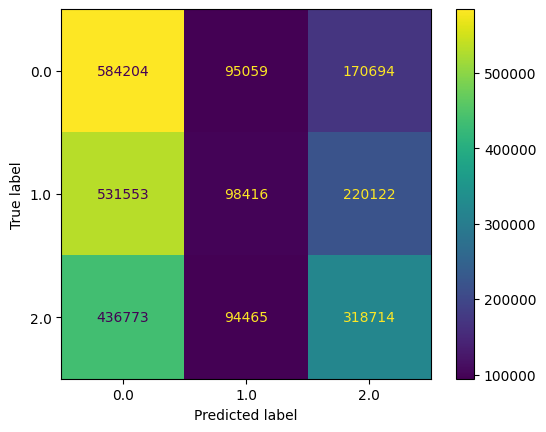

In [78]:
#MATRIZ DE CONFUSÃO

cm = confusion_matrix(Y_test, y_pred, labels=mlp_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_clf.classes_)
disp.plot()